In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import eval

In [3]:
res1 = pd.read_csv('../runs/827/827_8_results.csv')
res2 = pd.read_csv('../runs/827/827_16_results.csv')
res3 = pd.read_csv('../runs/827/827_25_results.csv')

label1 = 'epoch 8'
label2 = 'epoch 16'
label3 = 'epoch 25'

In [6]:
res3

,enrichment_percentile,threshold,ods_ratio,p-value,k,precision,recall
0,0.995,0.420272,13.269750,0.0,5.0,0.055293,0.041110
1,0.990,0.328508,8.888546,0.0,10.0,0.042520,0.057745
2,0.985,0.273274,6.790984,0.0,15.0,0.037620,0.073523
3,0.980,0.232912,5.620745,0.0,20.0,0.034252,0.090401
4,0.975,0.202856,5.016859,0.0,25.0,0.031321,0.101863
5,0.970,0.180165,4.535823,0.0,30.0,0.028988,0.111333
6,0.965,0.161720,4.106349,0.0,40.0,0.024978,0.128067
7,0.960,0.147165,3.800471,0.0,50.0,0.022555,0.144604


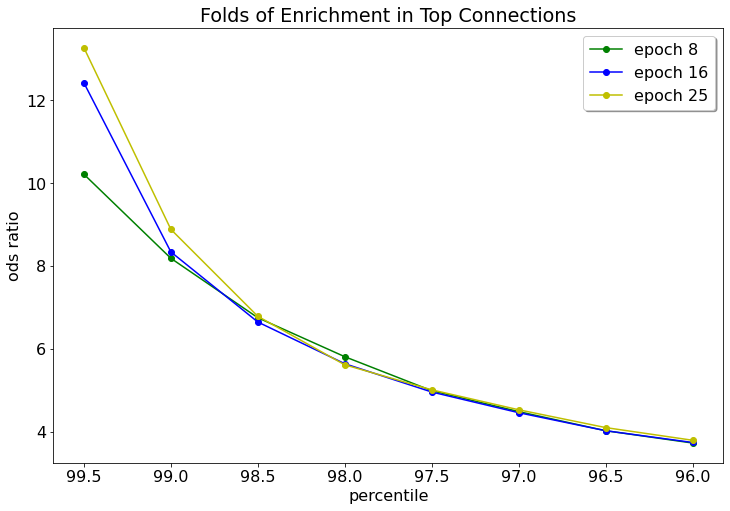

In [5]:
pretrained = pd.read_csv("pretrained_res.csv")
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
# plt.plot(100*pretrained["enrichment_percentile"], pretrained["ods_ratio"], marker="o", color="red", label = 'pretrained')
plt.plot(100*res1["enrichment_percentile"], res1["ods_ratio"], marker="o", color="green", label = label1)
plt.plot(100*res2["enrichment_percentile"], res2["ods_ratio"], marker="o", color="b", label = label2)
plt.plot(100*res3["enrichment_percentile"], res3["ods_ratio"], marker="o", color="y", label = label3)
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

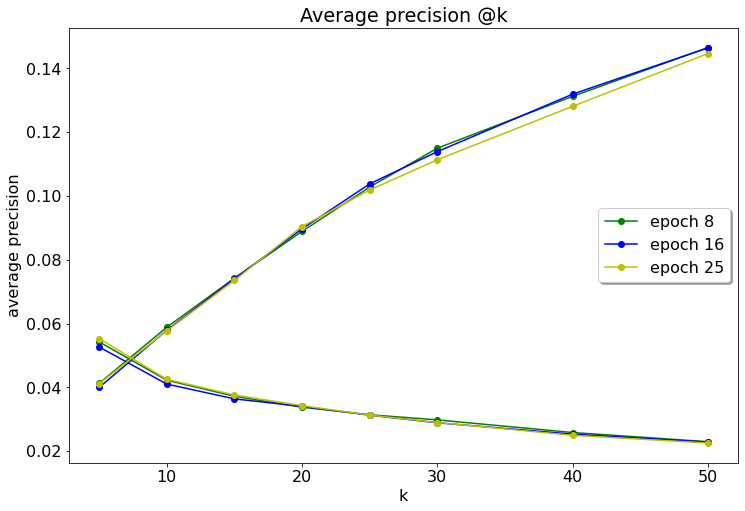

In [6]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(res1["k"], res1["precision"], marker="o", color="green", label = label1)
plt.plot(res1["k"], res1["recall"], marker="o", color="g")
plt.plot(res2["k"], res2["precision"], marker="o", color="b", label = label2)
plt.plot(res2["k"], res2["recall"], marker="o", color="b")
plt.plot(res3["k"], res3["precision"], marker="o", color="y", label = label3)
plt.plot(res3["k"], res3["recall"], marker="o", color="y")
# plt.plot(pretrained["k"], pretrained["precision"], marker="o", color="r", label = 'pretrained')
# plt.plot(pretrained["k"], pretrained["recall"], marker="o", color="red")
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'center right', shadow=True)
plt.show()



In [ ]:
res813 = pd.read_csv('../runs/813/813_results.csv')
res811 = pd.read_csv('../runs/811/811_results.csv')

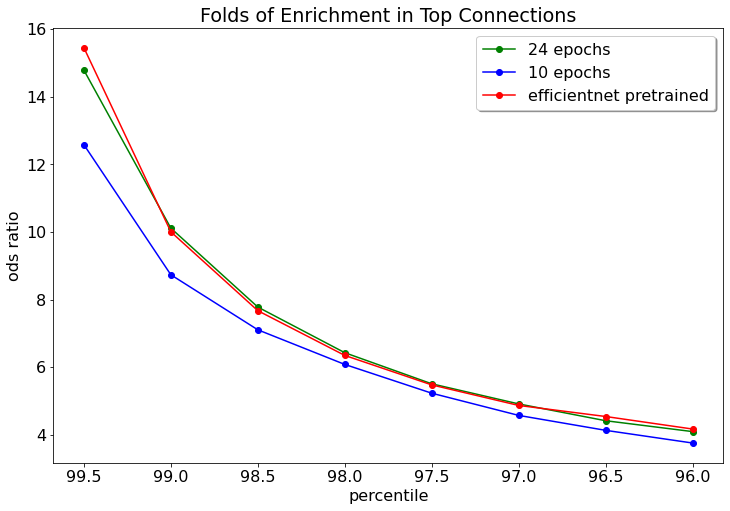

In [11]:
pre =  '/Users/mbornhol/git/neural-profiling/pre-trained/results/'
efficientnet_sphered = pd.read_csv(pre + 'res_enrichment_spherized.csv')
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*res813["enrichment_percentile"], res813["ods_ratio"], marker="o", color="green", label = '24 epochs')
plt.plot(100*res811["enrichment_percentile"], res811["ods_ratio"], marker="o", color="blue", label = '10 epochs')
plt.plot(100*efficientnet_sphered["enrichment_percentile"], efficientnet_sphered["ods_ratio"], marker="o", color="red", label = 'efficientnet pretrained')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

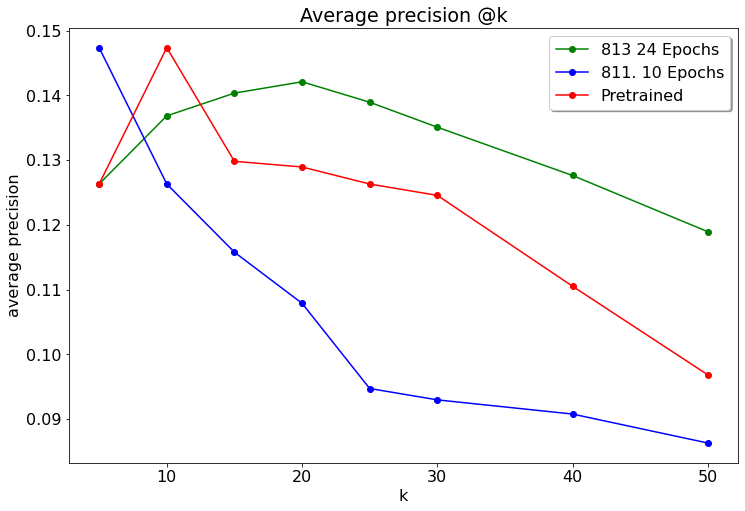

In [12]:
efficientnet_sphered = pd.read_csv(pre + 'res_prec_spherized.csv')
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(res813["k"], res813["precision"], marker="o", color="green", label = '813 24 Epochs')
plt.plot(res811["k"], res811["precision"], marker="o", color="blue", label = '811. 10 Epochs')
plt.plot(efficientnet_sphered["k"], efficientnet_sphered["precision"], marker="o", color="red", label = 'Pretrained')
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'upper right', shadow=True)
plt.show()

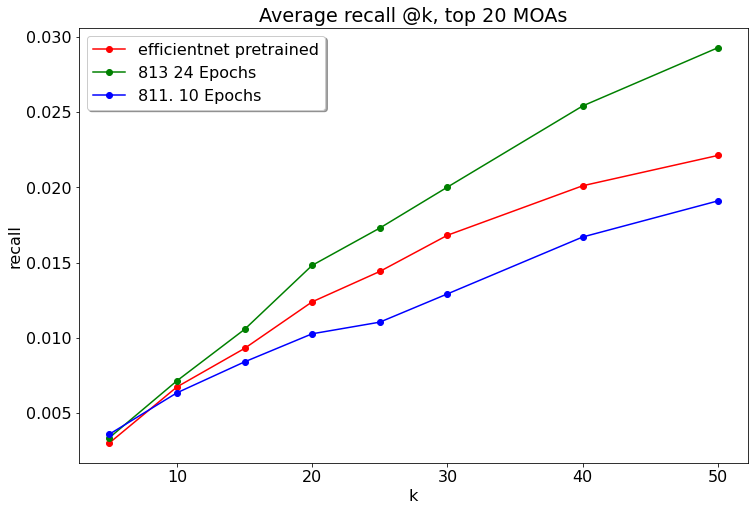

In [39]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average recall @k, top 20 MOAs")
plt.plot(efficientnet_sphered["k"], efficientnet_sphered["recall"], marker="o", color="red", label = 'efficientnet pretrained')
plt.plot(res813["k"], res813["recall"], marker="o", color="green", label = '813 24 Epochs')
plt.plot(res811["k"], res811["recall"], marker="o", color="blue", label = '811. 10 Epochs')
plt.ylabel('recall')
plt.xlabel('k')
plt.legend(loc = 'upper left', shadow=True)
plt.show()

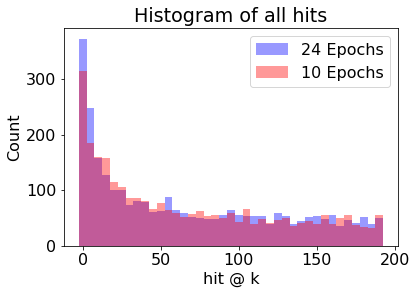

In [15]:
plt.style.use({'figure.facecolor':'white'})
plt.bar(res813['bins'], res813['h'], width= 5, alpha=0.4, color='blue', label='24 Epochs')
plt.bar(res811['bins'], res811['h'], width= 5 ,alpha=0.4, color='red', label='10 Epochs')
plt.xlabel('hit @ k')
plt.ylabel('Count')
plt.title('Histogram of all hits')
plt.legend()
plt.show()

In [18]:
sum(res813['h'].loc[:10])

1461

In [19]:
sum(res811['h'].loc[:10])

1431

now with 817_index



In [33]:
res819 = pd.read_csv('../runs/819/819_results.csv')
res827_8 = pd.read_csv('../runs/827/827_8_results.csv')
res827_16 = pd.read_csv('../runs/827/827_16_results.csv')
res827_25 = pd.read_csv('../runs/827/827_25_results.csv')

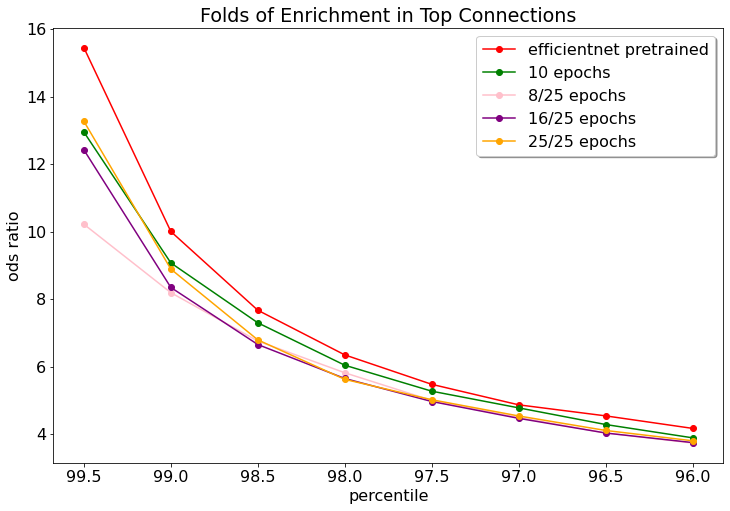

In [34]:
pre =  '/Users/mbornhol/git/neural-profiling/pre-trained/results/'
efficientnet_sphered = pd.read_csv(pre + 'res_enrichment_spherized.csv')
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*efficientnet_sphered["enrichment_percentile"], efficientnet_sphered["ods_ratio"], marker="o", color="red", label = 'efficientnet pretrained')
plt.plot(100*res819["enrichment_percentile"], res819["ods_ratio"], marker="o", color="green", label = '10 epochs')
plt.plot(100*res827_8["enrichment_percentile"], res827_8["ods_ratio"], marker="o", color="pink", label = '8/25 epochs')
plt.plot(100*res827_16["enrichment_percentile"], res827_16["ods_ratio"], marker="o", color="purple", label = '16/25 epochs')
plt.plot(100*res827_25["enrichment_percentile"], res827_25["ods_ratio"], marker="o", color="orange", label = '25/25 epochs')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

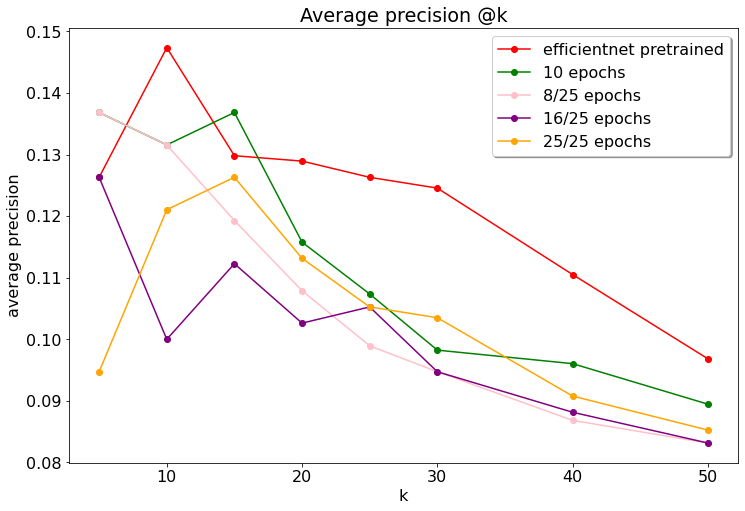

In [35]:
efficientnet_sphered = pd.read_csv(pre + 'res_prec_spherized.csv')
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(efficientnet_sphered["k"], efficientnet_sphered["precision"], marker="o", color="red", label = 'efficientnet pretrained')
plt.plot(res819["k"], res819["precision"], marker="o", color="green", label = '10 epochs')
plt.plot(res827_8["k"], res827_8["precision"], marker="o", color="pink", label = '8/25 epochs')
plt.plot(res827_16["k"], res827_16["precision"], marker="o", color="purple", label = '16/25 epochs')
plt.plot(res827_25["k"], res827_25["precision"], marker="o", color="orange", label = '25/25 epochs')
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'upper right', shadow=True)
plt.show()

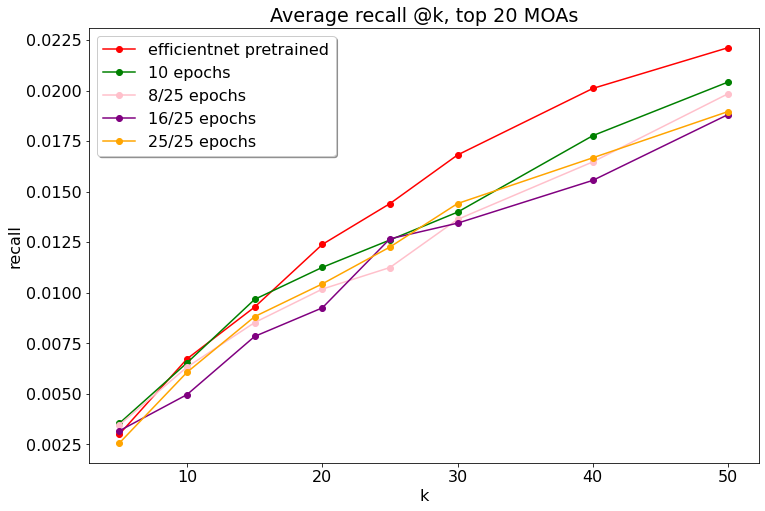

In [36]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average recall @k, top 20 MOAs")
plt.plot(efficientnet_sphered["k"], efficientnet_sphered["recall"], marker="o", color="red", label = 'efficientnet pretrained')
plt.plot(res819["k"], res819["recall"], marker="o", color="green", label = '10 epochs')
plt.plot(res827_8["k"], res827_8["recall"], marker="o", color="pink", label = '8/25 epochs')
plt.plot(res827_16["k"], res827_16["recall"], marker="o", color="purple", label = '16/25 epochs')
plt.plot(res827_25["k"], res827_25["recall"], marker="o", color="orange", label = '25/25 epochs')
plt.ylabel('recall')
plt.xlabel('k')
plt.legend(loc = 'upper left', shadow=True)
plt.show()

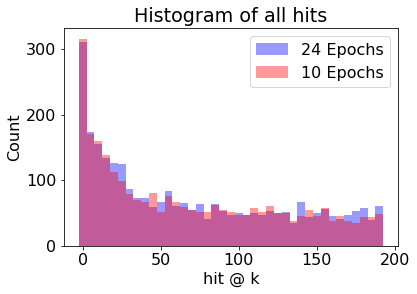

In [38]:
plt.style.use({'figure.facecolor':'white'})
plt.bar(res827_8['bins'], res827_8['h'], width= 5, alpha=0.4, color='blue', label='24 Epochs')
plt.bar(res827_25['bins'], res827_25['h'], width= 5 ,alpha=0.4, color='red', label='10 Epochs')
plt.xlabel('hit @ k')
plt.ylabel('Count')
plt.title('Histogram of all hits')
plt.legend()
plt.show()

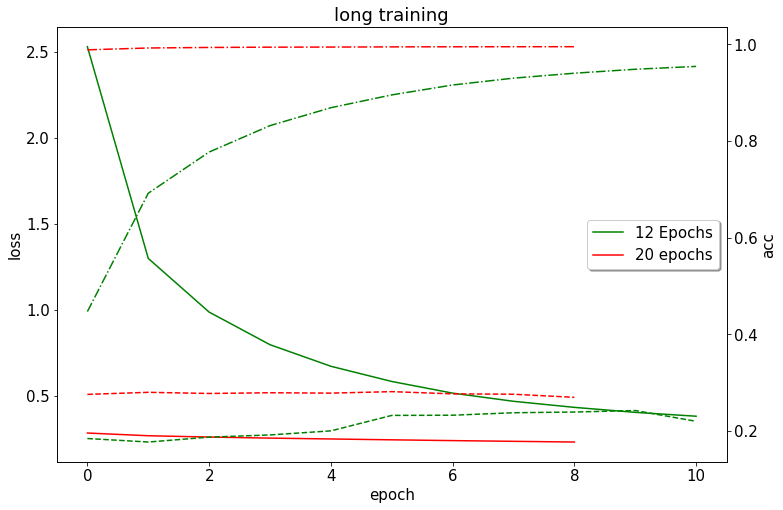

In [8]:
eval.plotting.accuracy(title="long training", index1='930', label_1='12 Epochs', index2='931', label_2='20 epochs')

In [5]:
res1 = pd.read_csv('../runs/930/results.csv')
res2 = pd.read_csv('../runs/931/results.csv')
res3 = pd.read_csv('../runs/827/827_25_results.csv')

label1 = 'epoch 12'
label2 = 'epoch 20'
label3 = 'epoch 25'

In [9]:
res1

,Unnamed: 0,enrichment_percentile,threshold,ods_ratio,p-value,k,precision,recall
0,0,0.995,0.480297,11.179628,1.231158e-314,5.0,0.060542,0.048127
1,1,0.990,0.361161,8.498828,0.000000e+00,10.0,0.047769,0.068861
2,2,0.985,0.290547,7.034133,0.000000e+00,15.0,0.040245,0.083266
3,3,0.980,0.243731,6.132519,0.000000e+00,20.0,0.036220,0.098999
4,4,0.975,0.209635,5.291784,0.000000e+00,25.0,0.032686,0.112713
5,5,0.970,0.183981,4.731186,0.000000e+00,30.0,0.030330,0.124913
6,6,0.965,0.163914,4.297659,0.000000e+00,40.0,0.027231,0.148126
7,7,0.960,0.147798,3.975863,0.000000e+00,50.0,0.024444,0.161839


In [10]:
res2

,Unnamed: 0,enrichment_percentile,threshold,ods_ratio,p-value,k,precision,recall
0,0,0.995,0.444055,13.483683,0.0,5.0,0.061242,0.046502
1,1,0.990,0.344518,9.841698,0.0,10.0,0.050394,0.073520
2,2,0.985,0.285340,7.615967,0.0,15.0,0.043395,0.091049
3,3,0.980,0.241839,6.426490,0.0,20.0,0.039020,0.105282
4,4,0.975,0.210570,5.668359,0.0,25.0,0.035101,0.116607
5,5,0.970,0.186838,5.046937,0.0,30.0,0.032342,0.130467
6,6,0.965,0.167936,4.538520,0.0,40.0,0.027822,0.149540
7,7,0.960,0.152718,4.271364,0.0,50.0,0.025092,0.164773


In [ ]:
pretrained = pd.read_csv("pretrained_res.csv")
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
# plt.plot(100*pretrained["enrichment_percentile"], pretrained["ods_ratio"], marker="o", color="red", label = 'pretrained')
plt.plot(100*res1["enrichment_percentile"], res1["ods_ratio"], marker="o", color="green", label = label1)
plt.plot(100*res2["enrichment_percentile"], res2["ods_ratio"], marker="o", color="b", label = label2)
# plt.plot(100*res3["enrichment_percentile"], res3["ods_ratio"], marker="o", color="y", label = label3)
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

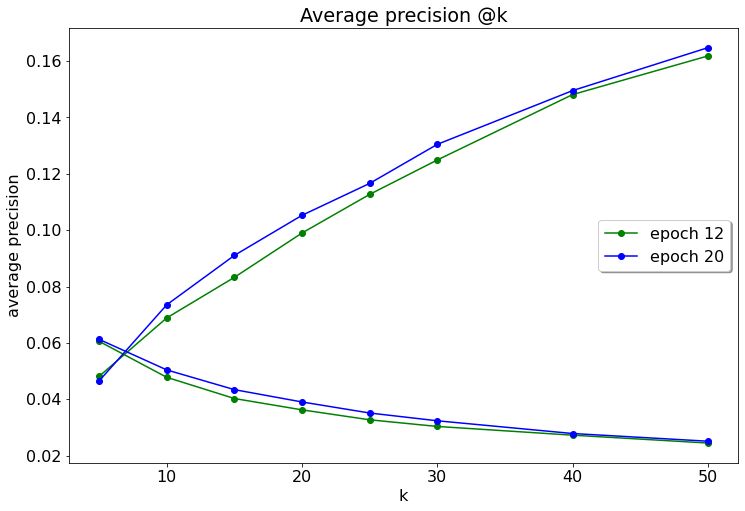

In [7]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(res1["k"], res1["precision"], marker="o", color="green", label = label1)
plt.plot(res1["k"], res1["recall"], marker="o", color="g")
plt.plot(res2["k"], res2["precision"], marker="o", color="b", label = label2)
plt.plot(res2["k"], res2["recall"], marker="o", color="b")
# plt.plot(res3["k"], res3["precision"], marker="o", color="y", label = label3)
# plt.plot(res3["k"], res3["recall"], marker="o", color="y")
# plt.plot(pretrained["k"], pretrained["precision"], marker="o", color="r", label = 'pretrained')
# plt.plot(pretrained["k"], pretrained["recall"], marker="o", color="red")
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'center right', shadow=True)
plt.show()